In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
ecg_data=pd.read_csv("csv_result-ECG5000_TEST.csv")

In [ ]:
df_num=ecg_data.select_dtypes(include=[np.number])
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_num)

In [ ]:
df_scaled=pd.DataFrame(df_scaled, columns=df_num.columns)
scaler=StandardScaler()
x=scaler.fit_transform(ecg_data.values)
y=x

In [ ]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
input_dim=x_train.shape[1]

In [ ]:
encoder=models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(8,activation='relu')
])

In [ ]:
decoder=models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(input_dim,activation='linear')
])

In [ ]:
autoencoder=models.Sequential([
    encoder, decoder
])

In [ ]:
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
autoencoder.fit(x_train, y_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8733
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4648
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2985
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2636
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2367
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2293
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2239
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2028
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1682
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1820
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1806
Epoch 12/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1667
Epoch 13/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1662
Epoch 14/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1561
Epoch 15/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
y_pred=autoencoder.predict(x_test)
mse=np.mean(np.power(x_test-y_pred,2), axis=1)
threshold=np.percentile(mse,95)
anomalies=mse>threshold

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
num_anomalies=np.sum(anomalies)
print(f"Num of Anomalies: {num_anomalies}")

Num of Anomalies: 45


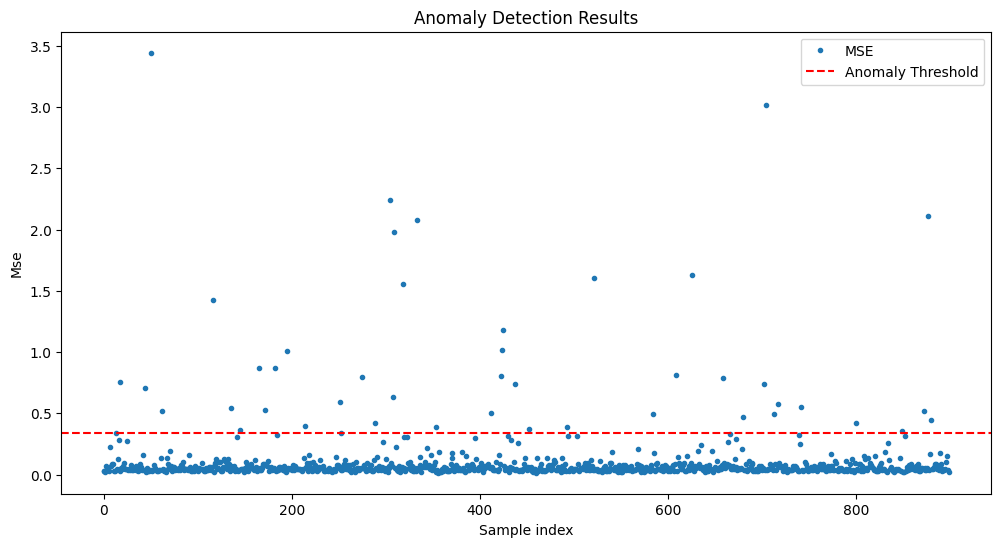

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(mse, marker='o',linestyle="",markersize=3,label="MSE")
plt.axhline(threshold,color="r",linestyle="--",label="Anomaly Threshold")
plt.xlabel("Sample index")
plt.ylabel("Mse")
plt.title("Anomaly Detection Results")
plt.legend()
plt.show()

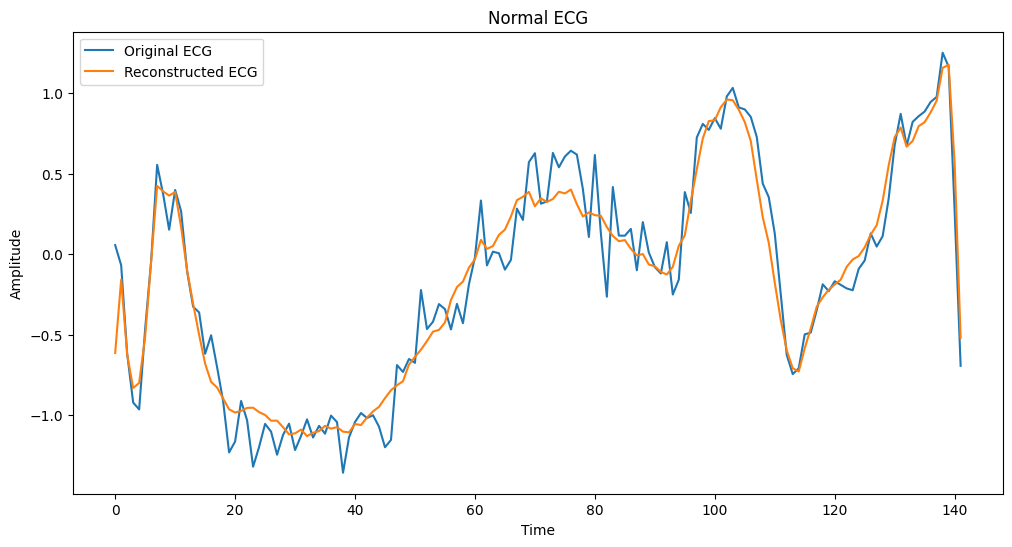

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(x_test[0], label="Original ECG")
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Normal ECG")
plt.show()

In [ ]:
y_true=np.zeros(len(x_test))
print("Confusion Matrix")
print(confusion_matrix(anomalies, anomalies))

Confusion Matrix
[[855   0]
 [  0  45]]


In [ ]:
print("Classification Report")
print(classification_report(anomalies, anomalies))

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       855
        True       1.00      1.00      1.00        45

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

